In [2]:
from astroquery.gaia import Gaia
from scipy import stats

import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

import os

In [3]:
cols =  ['source_id', 'random_index', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 
         'pm', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 
         'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
         'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_mean_flux_error', 'phot_g_mean_flux_over_error',
         'phot_g_mean_mag', 'phot_bp_n_obs', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
         'phot_bp_mean_flux_over_error', 'phot_bp_mean_mag', 'phot_rp_n_obs', 'phot_rp_mean_flux',
         'phot_rp_mean_flux_error', 'phot_rp_mean_flux_over_error', 'phot_rp_mean_mag',
         'phot_bp_rp_excess_factor', 'phot_bp_n_contaminated_transits', 'phot_bp_n_blended_transits',
         'phot_rp_n_blended_transits',
         'bp_rp', 'bp_g', 'g_rp', 'radial_velocity', 'radial_velocity_error',
         'rv_expected_sig_to_noise', 'rv_renormalised_gof', 'rv_chisq_pvalue', 
         'rv_template_teff', 'rv_template_logg', 'rv_template_fe_h', 'rv_atm_param_origin',
         'vbroad', 'vbroad_error', 'vbroad_nb_transits',
         'grvs_mag', 'grvs_mag_error', 'grvs_mag_nb_transits',
         'rvs_spec_sig_to_noise', 'phot_variable_flag',
         'l', 'b', 'ecl_lon', 'ecl_lat',
         'in_qso_candidates', 'in_galaxy_candidates', 'non_single_star', 'has_xp_continuous', 'has_xp_sampled', 'has_rvs', 'has_epoch_photometry', 'has_epoch_rv', 
         'has_mcmc_gspphot', 'has_mcmc_msc', 
         'teff_gspphot', 'teff_gspphot_lower', 'teff_gspphot_upper', 'logg_gspphot',
         'logg_gspphot_lower', 'logg_gspphot_upper',
         'mh_gspphot', 'mh_gspphot_lower', 'mh_gspphot_upper',
         'distance_gspphot', 'distance_gspphot_lower', 'distance_gspphot_upper',
         'azero_gspphot', 'azero_gspphot_lower', 'azero_gspphot_upper', 'ag_gspphot', 'ag_gspphot_lower', 'ag_gspphot_upper', 'ebpminrp_gspphot', 'ebpminrp_gspphot_lower', 
         'ebpminrp_gspphot_upper', 'parallax_corr', 'parallax_corr_error', 'distance', 'x', 'y', 'z', 'pml', 'pmb', 'vx', 'vy', 'vz', 'X', 'Y', 'Z', 'vX', 'vY', 'vZ', 'phi', 
         'R', 'vR', 'vT', 'v_toomre']
print(len(cols))
custom_cols = ['source_id', 'random_index', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 
         'pm', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 
         'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
         'radial_velocity', 'radial_velocity_error',
         'rv_expected_sig_to_noise', 'rv_renormalised_gof', 'rv_chisq_pvalue', 
         'rv_template_teff', 'rv_template_logg', 'rv_template_fe_h', 'rv_atm_param_origin',
         'l', 'b', 'ecl_lon', 'ecl_lat',
         'ebpminrp_gspphot_upper', 'parallax_corr', 'parallax_corr_error', 'distance', 'x', 'y', 'z', 'pml', 'pmb', 'vx', 'vy', 'vz', 'X', 'Y', 'Z', 'vX', 'vY', 'vZ', 'phi', 
         'R', 'vR', 'vT', 'v_toomre']
print(len(custom_cols))

120
60


In [4]:
premade_testing_data = "c:\\Games\\ThesisData\\precutGaiaData\\GaiaDR3_poege5_DoddQuality_2p5kpc.parquet"
df_test = pl.read_parquet(premade_testing_data).select(custom_cols)

In [5]:
v_lsr = 232.8 # McMillan 2017

df_test = df_test.with_columns(
    (pl.col('vT')-v_lsr).alias('vT_adj'))
#print(df_test.filter(pl.col('vT_adj')))
filtered_vT = df_test.filter(pl.col('vT_adj').is_between(-250, 150)).select('vT_adj').to_numpy()
# min_val = abs(filtered_vT.min())+1e-6
# max_val = abs(filtered_vT.max())+1e-6

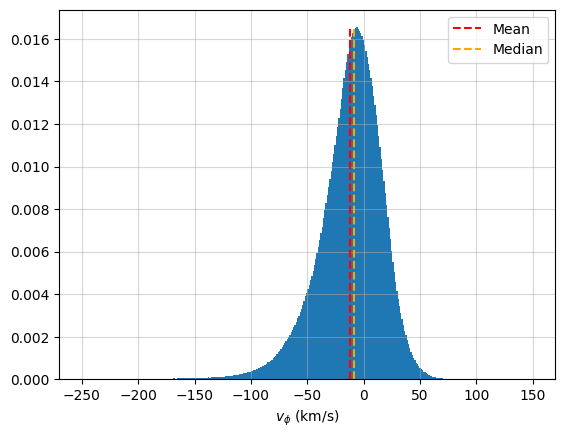

In [62]:
import customClasses as vF
import importlib
importlib.reload(vF)
import pickle

with open('savedMLEparams.pickle', 'rb') as handle:
    savedMLEparams = pickle.load(handle)

with open('savedLSQparams.pickle', 'rb') as handle:
    savedLSQparams = pickle.load(handle)
N_bins = 350
exclude = [2]
func_names = ['skewnorm', 'norm', 'gennorm', 'johnsonsu']
param_numbers = [3, 2, 3, 4]

for item in exclude:
    func_names.pop(item)
    param_numbers.pop(item)
    savedMLEparams.pop(item)
    savedLSQparams.pop(item)

testFitter = vF.velocityFitter(filtered_vT, N_bins, func_names, param_numbers, MLEparams=savedMLEparams, LSQparams=savedLSQparams)
testFitter.init_plot()
# testFitter.MLE_fit()
# testFitter.LSQ_fit()

In [63]:
testFitter.function_comparer(method='MLE')
testFitter.function_comparer(method='LSQ')

MLE results:
johnsonsu: r2 = 0.9991, S = 0.000007, AIC = 6339.983
norm: r2 = 0.9432, S = 0.000422, AIC = 8806.973
skewnorm: r2 = 0.9858, S = 0.000106, AIC = 8985.419
LSQ results:
johnsonsu: r2 = 0.9996, S = 0.000003, AIC = 6481.294
skewnorm: r2 = 0.9978, S = 0.000016, AIC = 9996.753
norm: r2 = 0.9888, S = 0.000083, AIC = 11630.464


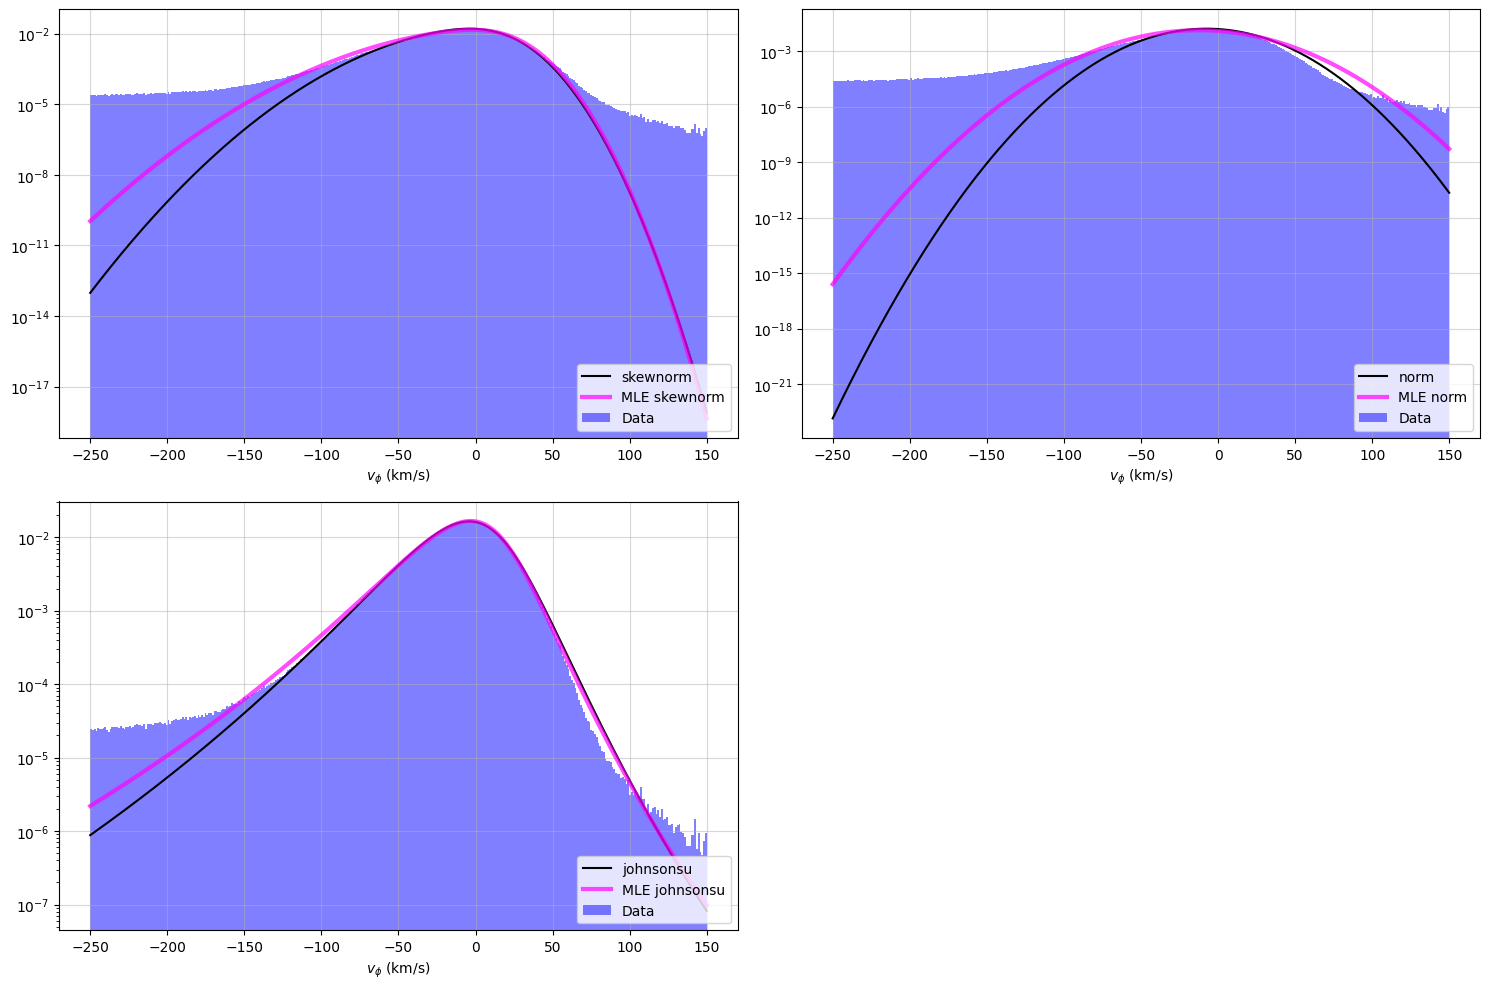

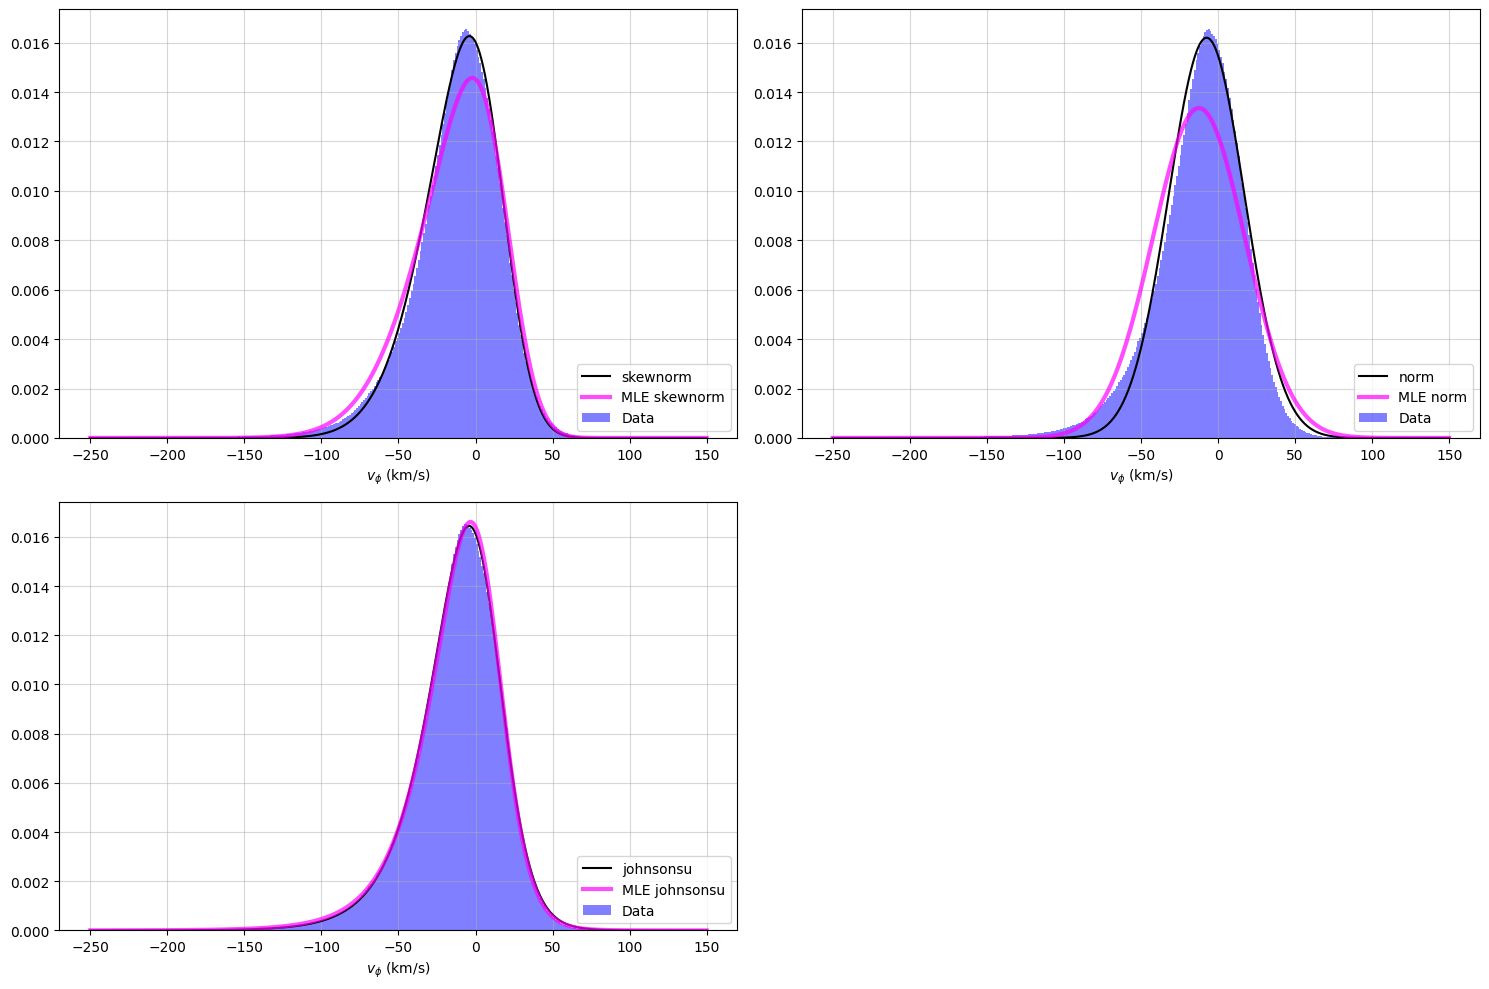

In [64]:
testFitter.plot_distributions(log=True)
testFitter.plot_distributions(log=False)